In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('OnlineRetail.csv', header = 0, encoding = 'ISO-8859-1')
display(data)
data.info()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [2]:
#2.	Thực hiện phát hiện giá trị ngoại lai của thuộc tính Quantity và Thuộc tính UnitPrice
#	Tiến hành lọc riêng bộ dữ liệu chứa giá trị ngoại lai và bộ dữ liệu sạch
#	Mô tả thông tin của bộ dữ liệu trên và nhận xét

In [3]:
#phát hiện giá trị ngoại lai của thuộc tính Quantity và Thuộc tính UnitPrice

<AxesSubplot:>

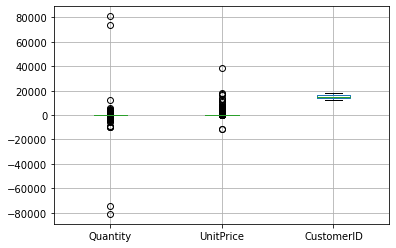

In [15]:
# vẽ biểu đồ boxplot cho các đặc trưng
data.boxplot()

C:\Users\Doan Huyen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Quantity'>

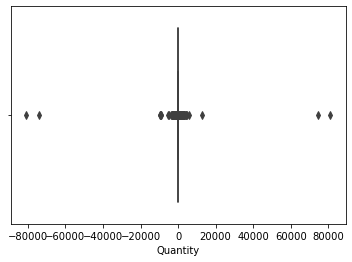

In [24]:
# vẽ biểu đồ box plot 
sns.boxplot(data["Quantity"])


C:\Users\Doan Huyen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='UnitPrice'>

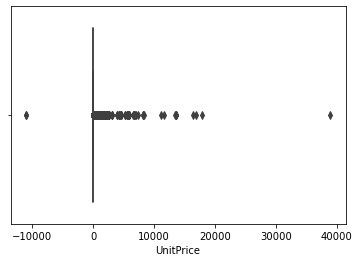

In [25]:
sns.boxplot(data["UnitPrice"])

In [ ]:
#Ta thấy trên hình có 1 vài ngoại lai xuất hiện

In [19]:
#Xử lý ngoại lai với IQR
# tính giá trị Q1 và Q3
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)


In [20]:
# tính IQR 
IQR = Q3-Q1

In [21]:
# lọc dữ liệu ngoại lai
data1 = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

C:\Users\DOANHU~1\AppData\Local\Temp/ipykernel_1820/4113337541.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data1 = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]


<AxesSubplot:>

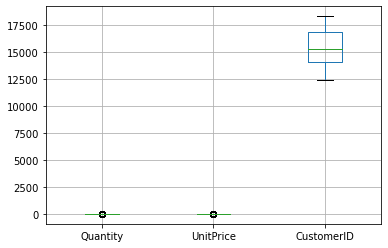

In [22]:
data1.boxplot()

C:\Users\Doan Huyen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Quantity'>

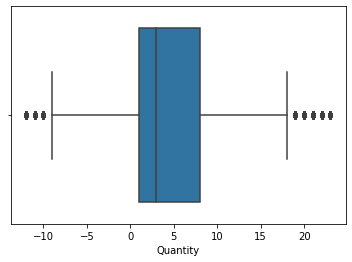

In [26]:
sns.boxplot(data1["Quantity"])

C:\Users\Doan Huyen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='UnitPrice'>

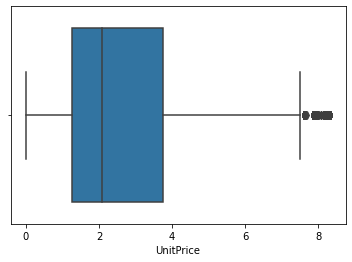

In [27]:
sns.boxplot(data1["UnitPrice"])

In [28]:
#Có thể thấy biểu đồ đã thể hiện dữ liệu được phân bố đều hơn lúc chưa loại bỏ ngoại lai

In [31]:
# mô tả dữ liệu
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [30]:
# mô tả dữ liệu
data1.describe()

,Quantity,UnitPrice,CustomerID
count,444108.000000,444108.000000,327498.000000
mean,4.803066,2.694544,15345.003670
std,4.616762,1.930320,1704.517156
min,-12.000000,0.000000,12347.000000
25%,1.000000,1.250000,14041.000000
50%,3.000000,2.080000,15287.000000
75%,8.000000,3.750000,16843.000000
max,23.000000,8.330000,18287.000000
